In [1]:
import numpy as np


# Generate a legendre basis of size `size`
def legendre_basis(size):
    basis = []
    for i in range(size):
        coeffs = np.zeros(size)
        coeffs[i] = 1
        basis.append(np.polynomial.legendre.Legendre(coeffs))
    return basis

In [2]:
# Generate the Aliasing Operator norm plot as we move each next basis function into the modeled space.


def aliasing_operator(
    basis_functions, sample_points, model_size: int
) -> tuple[np.ndarray, float]:
    """
    Given a set of basis functions and sample points, compute the aliasing operator A and its 2-norm.

    Parameters:
    - basis_functions: List of callable basis functions.
    - sample_points: Array of sample points where the basis functions are evaluated.
    - model_size: Number of basis functions to consider as modeled (the rest are unmode
    led).
    """
    # M_top = [M_TM | M_TU]
    M_top_half = np.array(
        [p(sample_points) for p in basis_functions]
    ).T  # so that rows are sample points, cols are basis functions

    M_TM, M_TU = M_top_half[:, :model_size], M_top_half[:, model_size:]
    M_TM_plus = np.linalg.pinv(M_TM)

    # A = M_TM^+ @ M_TU
    return (A := M_TM_plus @ M_TU), np.linalg.norm(A, ord=2).astype(float)

In [9]:
import matplotlib.pyplot as plt

m = 150  # Total number of basis functions (Modeled + Unmodeled)
n = 1000
complete_legendre_basis = legendre_basis(m)  # Full basis

modeled_functions = m - 50  # Pick a number of fixed modeled basis functions


norms_uniform_seed_0 = []
norms_uniform_seed_1 = []
norms_uniform_seed_2 = []
norms_uniform_seed_3 = []


norms_legendre = []
norms_regular = []


x_axis = range(1, n + 1, 10)
for n in x_axis:
    # Pick Uniformly random points to sample our basis at
    np.random.seed(0)
    uniform_points_seed_0 = np.random.uniform(-1, 1, n)
    np.random.seed(1)
    uniform_points_seed_1 = np.random.uniform(-1, 1, n)
    np.random.seed(2)
    uniform_points_seed_2 = np.random.uniform(-1, 1, n)
    np.random.seed(3)
    uniform_points_seed_3 = np.random.uniform(-1, 1, n)

    # Pick Legendre-Gauss points to sample our basis at
    legendre_gauss_points, _ = np.polynomial.legendre.leggauss(n)

    # Compute the aliasing operator and its norm for both sampling strategies
    _, norm_uniform_seed_0 = aliasing_operator(
        complete_legendre_basis, uniform_points_seed_0, model_size=modeled_functions
    )
    _, norm_uniform_seed_1 = aliasing_operator(
        complete_legendre_basis, uniform_points_seed_1, model_size=modeled_functions
    )
    _, norm_uniform_seed_2 = aliasing_operator(
        complete_legendre_basis, uniform_points_seed_2, model_size=modeled_functions
    )
    _, norm_uniform_seed_3 = aliasing_operator(
        complete_legendre_basis, uniform_points_seed_3, model_size=modeled_functions
    )

    _, norm_legendre = aliasing_operator(
        complete_legendre_basis, legendre_gauss_points, model_size=modeled_functions
    )
    _, norm_regular = aliasing_operator(
        complete_legendre_basis, np.linspace(-1, 1, n), model_size=modeled_functions
    )

    norms_uniform_seed_0.append(norm_uniform_seed_0)
    norms_uniform_seed_1.append(norm_uniform_seed_1)
    norms_uniform_seed_2.append(norm_uniform_seed_2)
    norms_uniform_seed_3.append(norm_uniform_seed_3)

    norms_legendre.append(norm_legendre)
    norms_regular.append(norm_regular)
    print(f"n={n}")

n=1
n=11
n=21
n=31
n=41
n=51
n=61
n=71
n=81
n=91
n=101
n=111
n=121
n=131
n=141
n=151
n=161
n=171
n=181
n=191
n=201
n=211
n=221
n=231
n=241
n=251
n=261
n=271
n=281
n=291
n=301
n=311
n=321
n=331
n=341
n=351
n=361
n=371
n=381
n=391
n=401
n=411
n=421
n=431
n=441
n=451
n=461
n=471
n=481
n=491
n=501
n=511
n=521
n=531
n=541
n=551
n=561
n=571
n=581
n=591
n=601
n=611
n=621
n=631
n=641
n=651
n=661
n=671
n=681
n=691
n=701
n=711
n=721
n=731
n=741
n=751
n=761
n=771
n=781
n=791
n=801
n=811
n=821
n=831
n=841
n=851
n=861
n=871
n=881
n=891
n=901
n=911
n=921
n=931
n=941
n=951
n=961
n=971
n=981
n=991


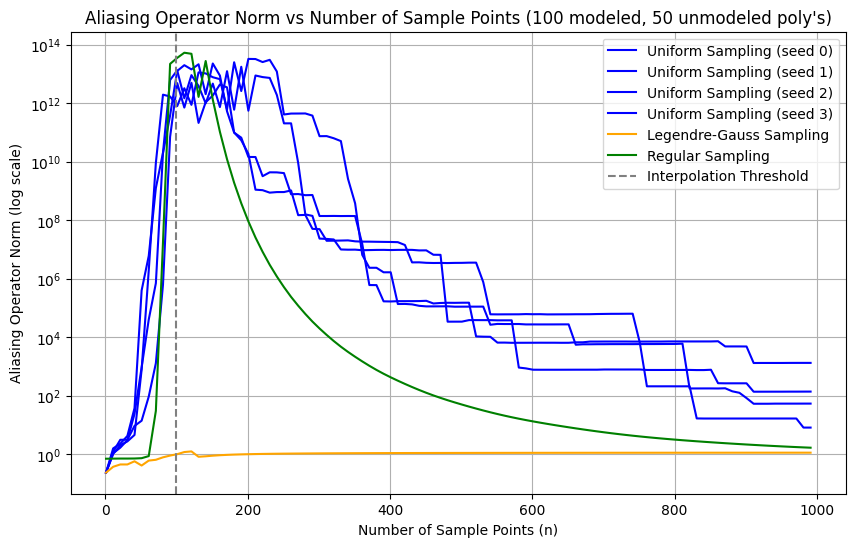

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, norms_uniform_seed_0, label="Uniform Sampling (seed 0)", color="blue")
plt.plot(x_axis, norms_uniform_seed_1, label="Uniform Sampling (seed 1)", color="blue")
plt.plot(x_axis, norms_uniform_seed_2, label="Uniform Sampling (seed 2)", color="blue")
plt.plot(x_axis, norms_uniform_seed_3, label="Uniform Sampling (seed 3)", color="blue")

plt.plot(x_axis, norms_legendre, label="Legendre-Gauss Sampling", color="orange")
plt.plot(x_axis, norms_regular, label="Regular Sampling", color="green")
plt.axvline(
    x=modeled_functions, color="gray", linestyle="--", label="Interpolation Threshold"
)
plt.yscale("log")
plt.xlabel("Number of Sample Points (n)")
plt.ylabel("Aliasing Operator Norm (log scale)")
plt.title(
    f"Aliasing Operator Norm vs Number of Sample Points ({modeled_functions} modeled, {m-modeled_functions} unmodeled poly's)"
)
plt.legend()
plt.grid(True)
plt.show()